In [145]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.stats import triang  
from scipy import signal
from scipy.signal import *
from scipy.fftpack import *
from control.matlab import *
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# 6.2.1
Используя прямоугольное окно, рассчитайте КИХ-фильтр нижних частот с линейной фазой в соответствии с вариантом.

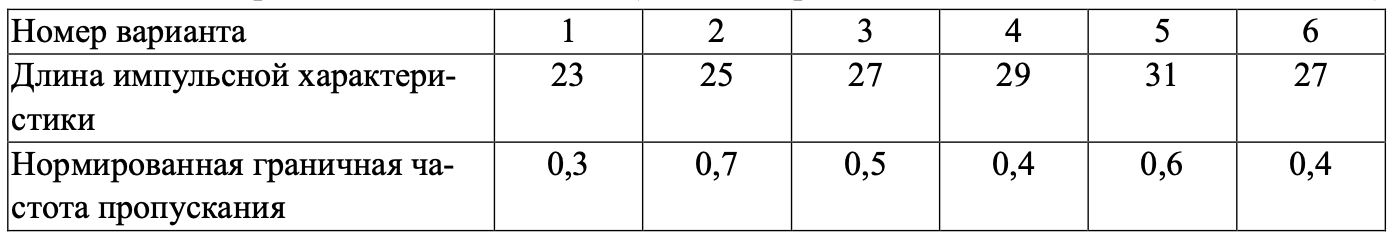

Постройте график импульсной характеристики, идеальные и действительные АЧХ (в логарифмическом масштабе) и ФЧХ, а также диаграмму расположения нулей. Для устранения скачков фазы воспользуйтесь функцией unwrap.

Как объяснить отклонение АЧХ и ФЧХ фильтра от идеальных? Что изменится при использовании нулевой фазы, линейной фазы, рассчитанной для длины импульсной характеристики в 11 отсчетов?

In [146]:
N = 29
w_sr = 0.4

In [147]:
def KIHfilter(N, w_sr):
    M = N / 2;
    n = np.arange(np.floor(-M), np.floor(M))

    # Считаем частоту
    h = w_sr * np.sinc(w_sr * (n));
    w = signal.windows.boxcar(N)
    h = h * np.transpose(w)
    H, wi = freqz(h, 1);

    y = np.abs(wi) / np.pi
    H_abs = np.abs(H)
    L = 20 * np.log10(np.abs(H))
    H_unwrap = np.unwrap(np.angle(H))
    
    impulse = np.repeat(0., N)
    impulse[0] = 1.
    x_range = np.arange(0, N)
    response = signal.lfilter(h, 1, impulse)
    return y, H_abs, L, H_unwrap, x_range, response

In [148]:
y, H_abs, L, H_unwrap, x_range, response = KIHfilter(N, w_sr)

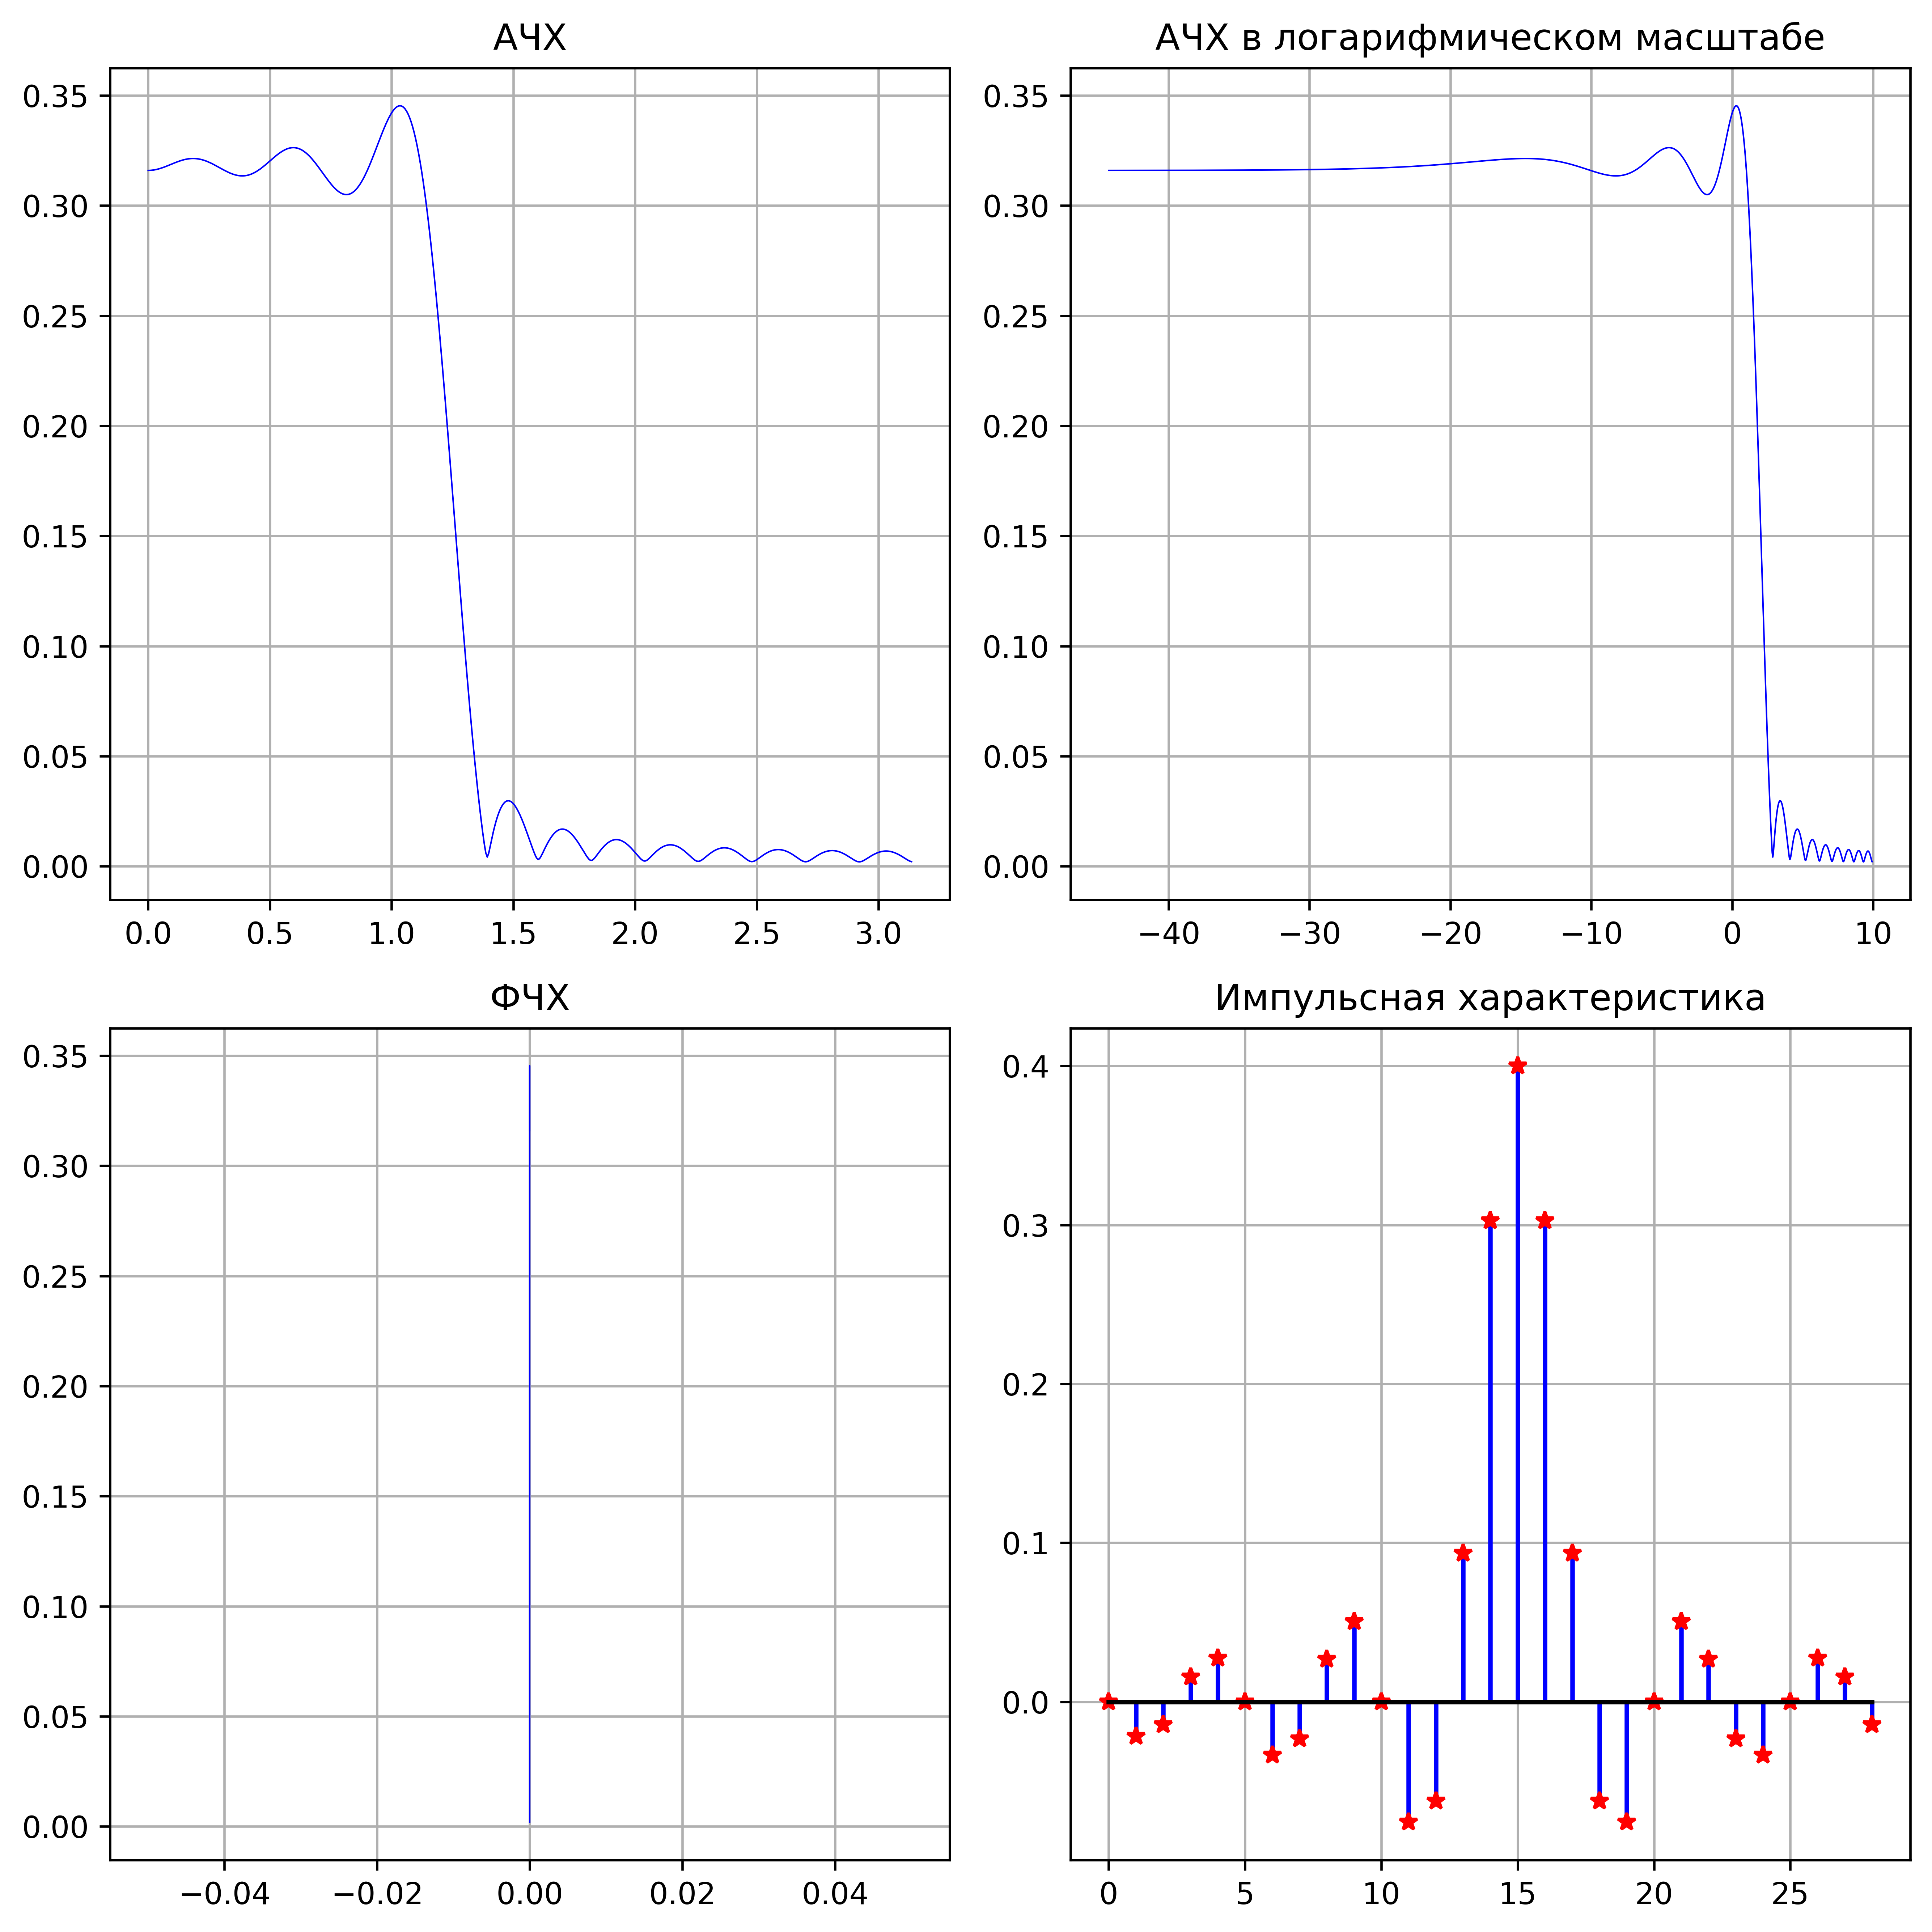

In [149]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 2, 1)
pylab.plot(H_abs, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ')

pylab.subplot(2, 2, 2)
pylab.plot(L, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ в логарифмическом масштабе')

pylab.subplot(2, 2, 3)
pylab.plot(H_unwrap, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('ФЧХ')

pylab.subplot(2, 2, 4)
pylab.stem(x_range, response, linefmt='-b', basefmt='-k', markerfmt='*r');
pylab.grid()
pylab.title('Импульсная характеристика')

pylab.tight_layout()
pylab.savefig('6_2_1_PH.png', dpi=600)
pylab.show()

# 6.2.2
Выполните задание 6.2.1 для длины импульсной характеристики, большей на единицу. Что можно сказать о симметрии импульсной характеристики? Сравните поведение АЧХ двух фильтров в области границы полосы пропускания.

In [150]:
N = 30

In [151]:
y, H_abs, L, H_unwrap, x_range, response = KIHfilter(N, w_sr)

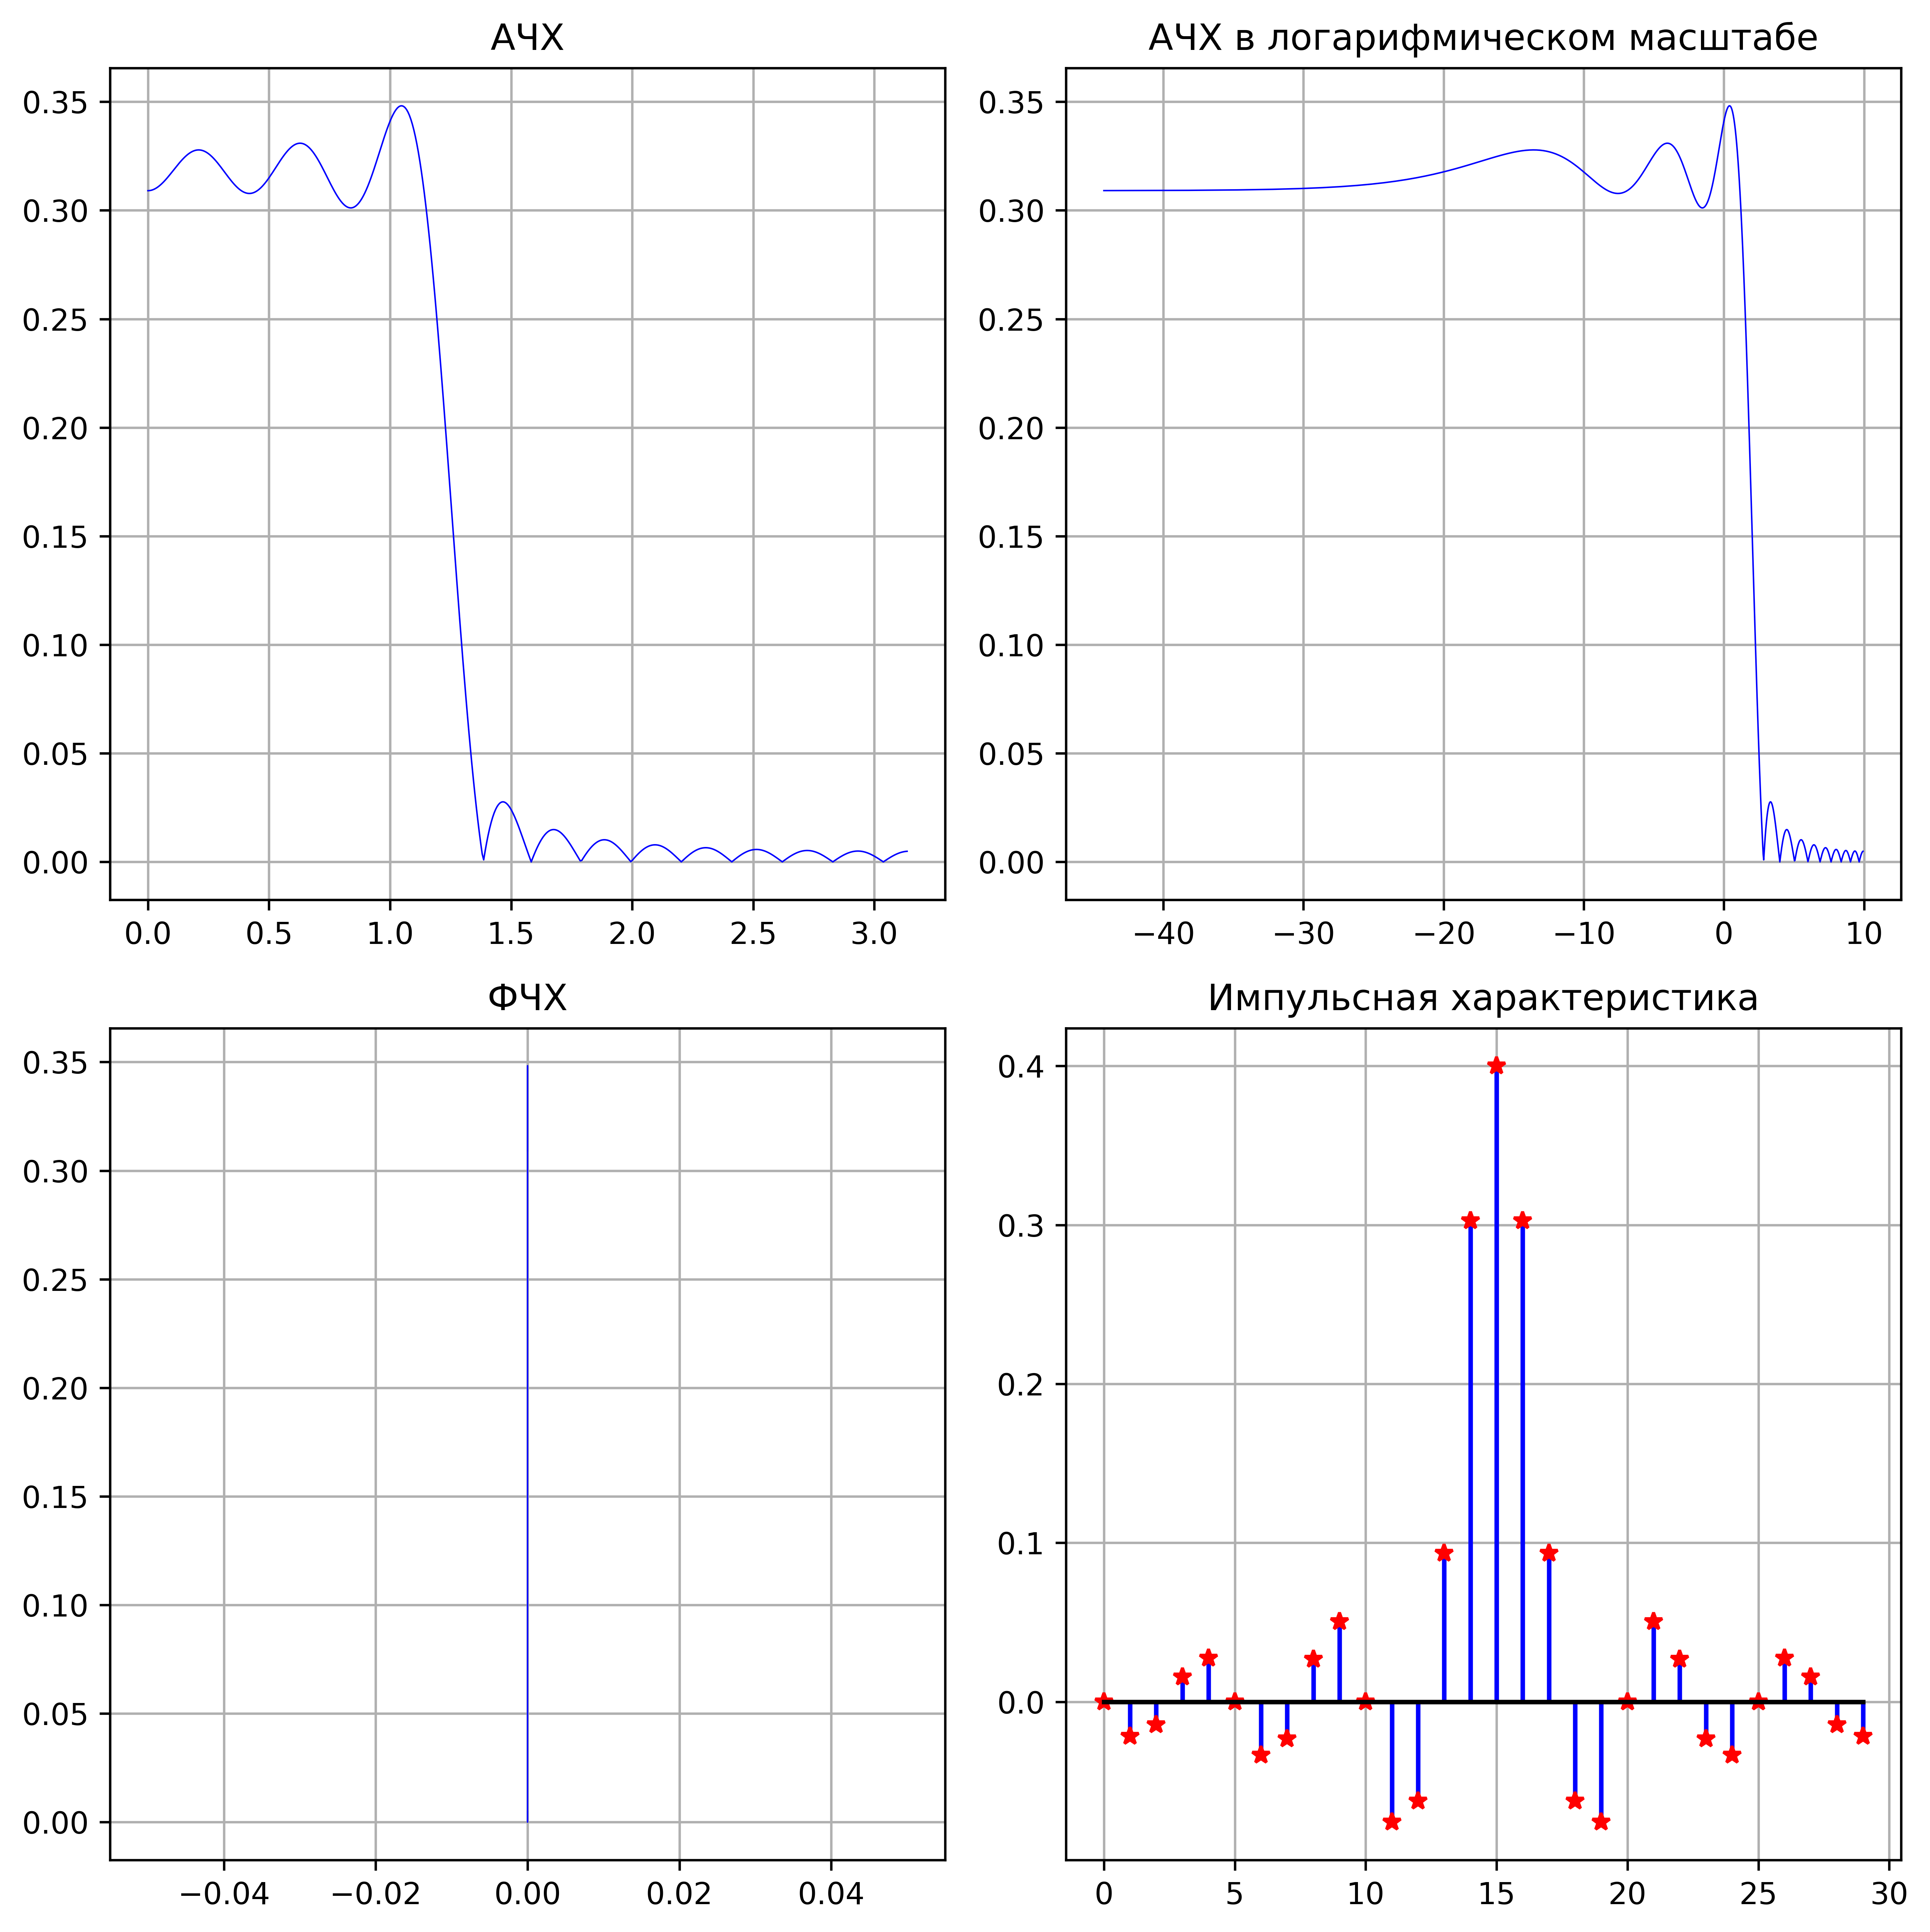

In [152]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 2, 1)
pylab.plot(H_abs, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ')

pylab.subplot(2, 2, 2)
pylab.plot(L, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ в логарифмическом масштабе')

pylab.subplot(2, 2, 3)
pylab.plot(H_unwrap, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('ФЧХ')

pylab.subplot(2, 2, 4)
pylab.stem(x_range, response, linefmt='-b', basefmt='-k', markerfmt='*r');
pylab.grid()
pylab.title('Импульсная характеристика')

pylab.tight_layout()
pylab.savefig('6_2_2_PH.png', dpi=600)
pylab.show()

# 6.2.3
Постройте следующие временные окна и их АЧХ: треугольное, Хэмминга, Блэкмана. Используйте функции triang, hamming, blackman.

In [153]:
N = 29

In [154]:
def HYL(w):
    global N, w_sr
    M = N / 2;
    n = np.arange(np.floor(-M), np.floor(M))
    h = w_sr * np.sinc(w_sr * (n));
    h = h * np.transpose(w)
    H, wi_r = freqz(h, 1)
    H_abs = np.abs(H)
    y = np.abs(wi_r) / np.pi
    L = 20 * np.log10(np.abs(H))
    return H_abs, y, L

In [155]:
w_bart = np.bartlett(N)
x_bart, y_bart, L_bart = HYL(w_bart)

w_ham = np.hamming(N)
x_ham, y_ham, L_ham = HYL(w_ham)

w_bla = np.blackman(N)
x_bla, y_bla, L_bla = HYL(w_bla)

In [156]:
def draw(i, w, x, y, name):
    pylab.subplot(3, 2, i)
    pylab.plot(w, linestyle='-', color='b', linewidth=0.5);
    pylab.grid()
    pylab.title(f'Окно {name}')
    pylab.subplot(3, 2, i + 1)
    pylab.plot(x, y, linestyle='-', color='b', linewidth=0.5);
    pylab.grid()
    pylab.title(f'АЧХ {name}')

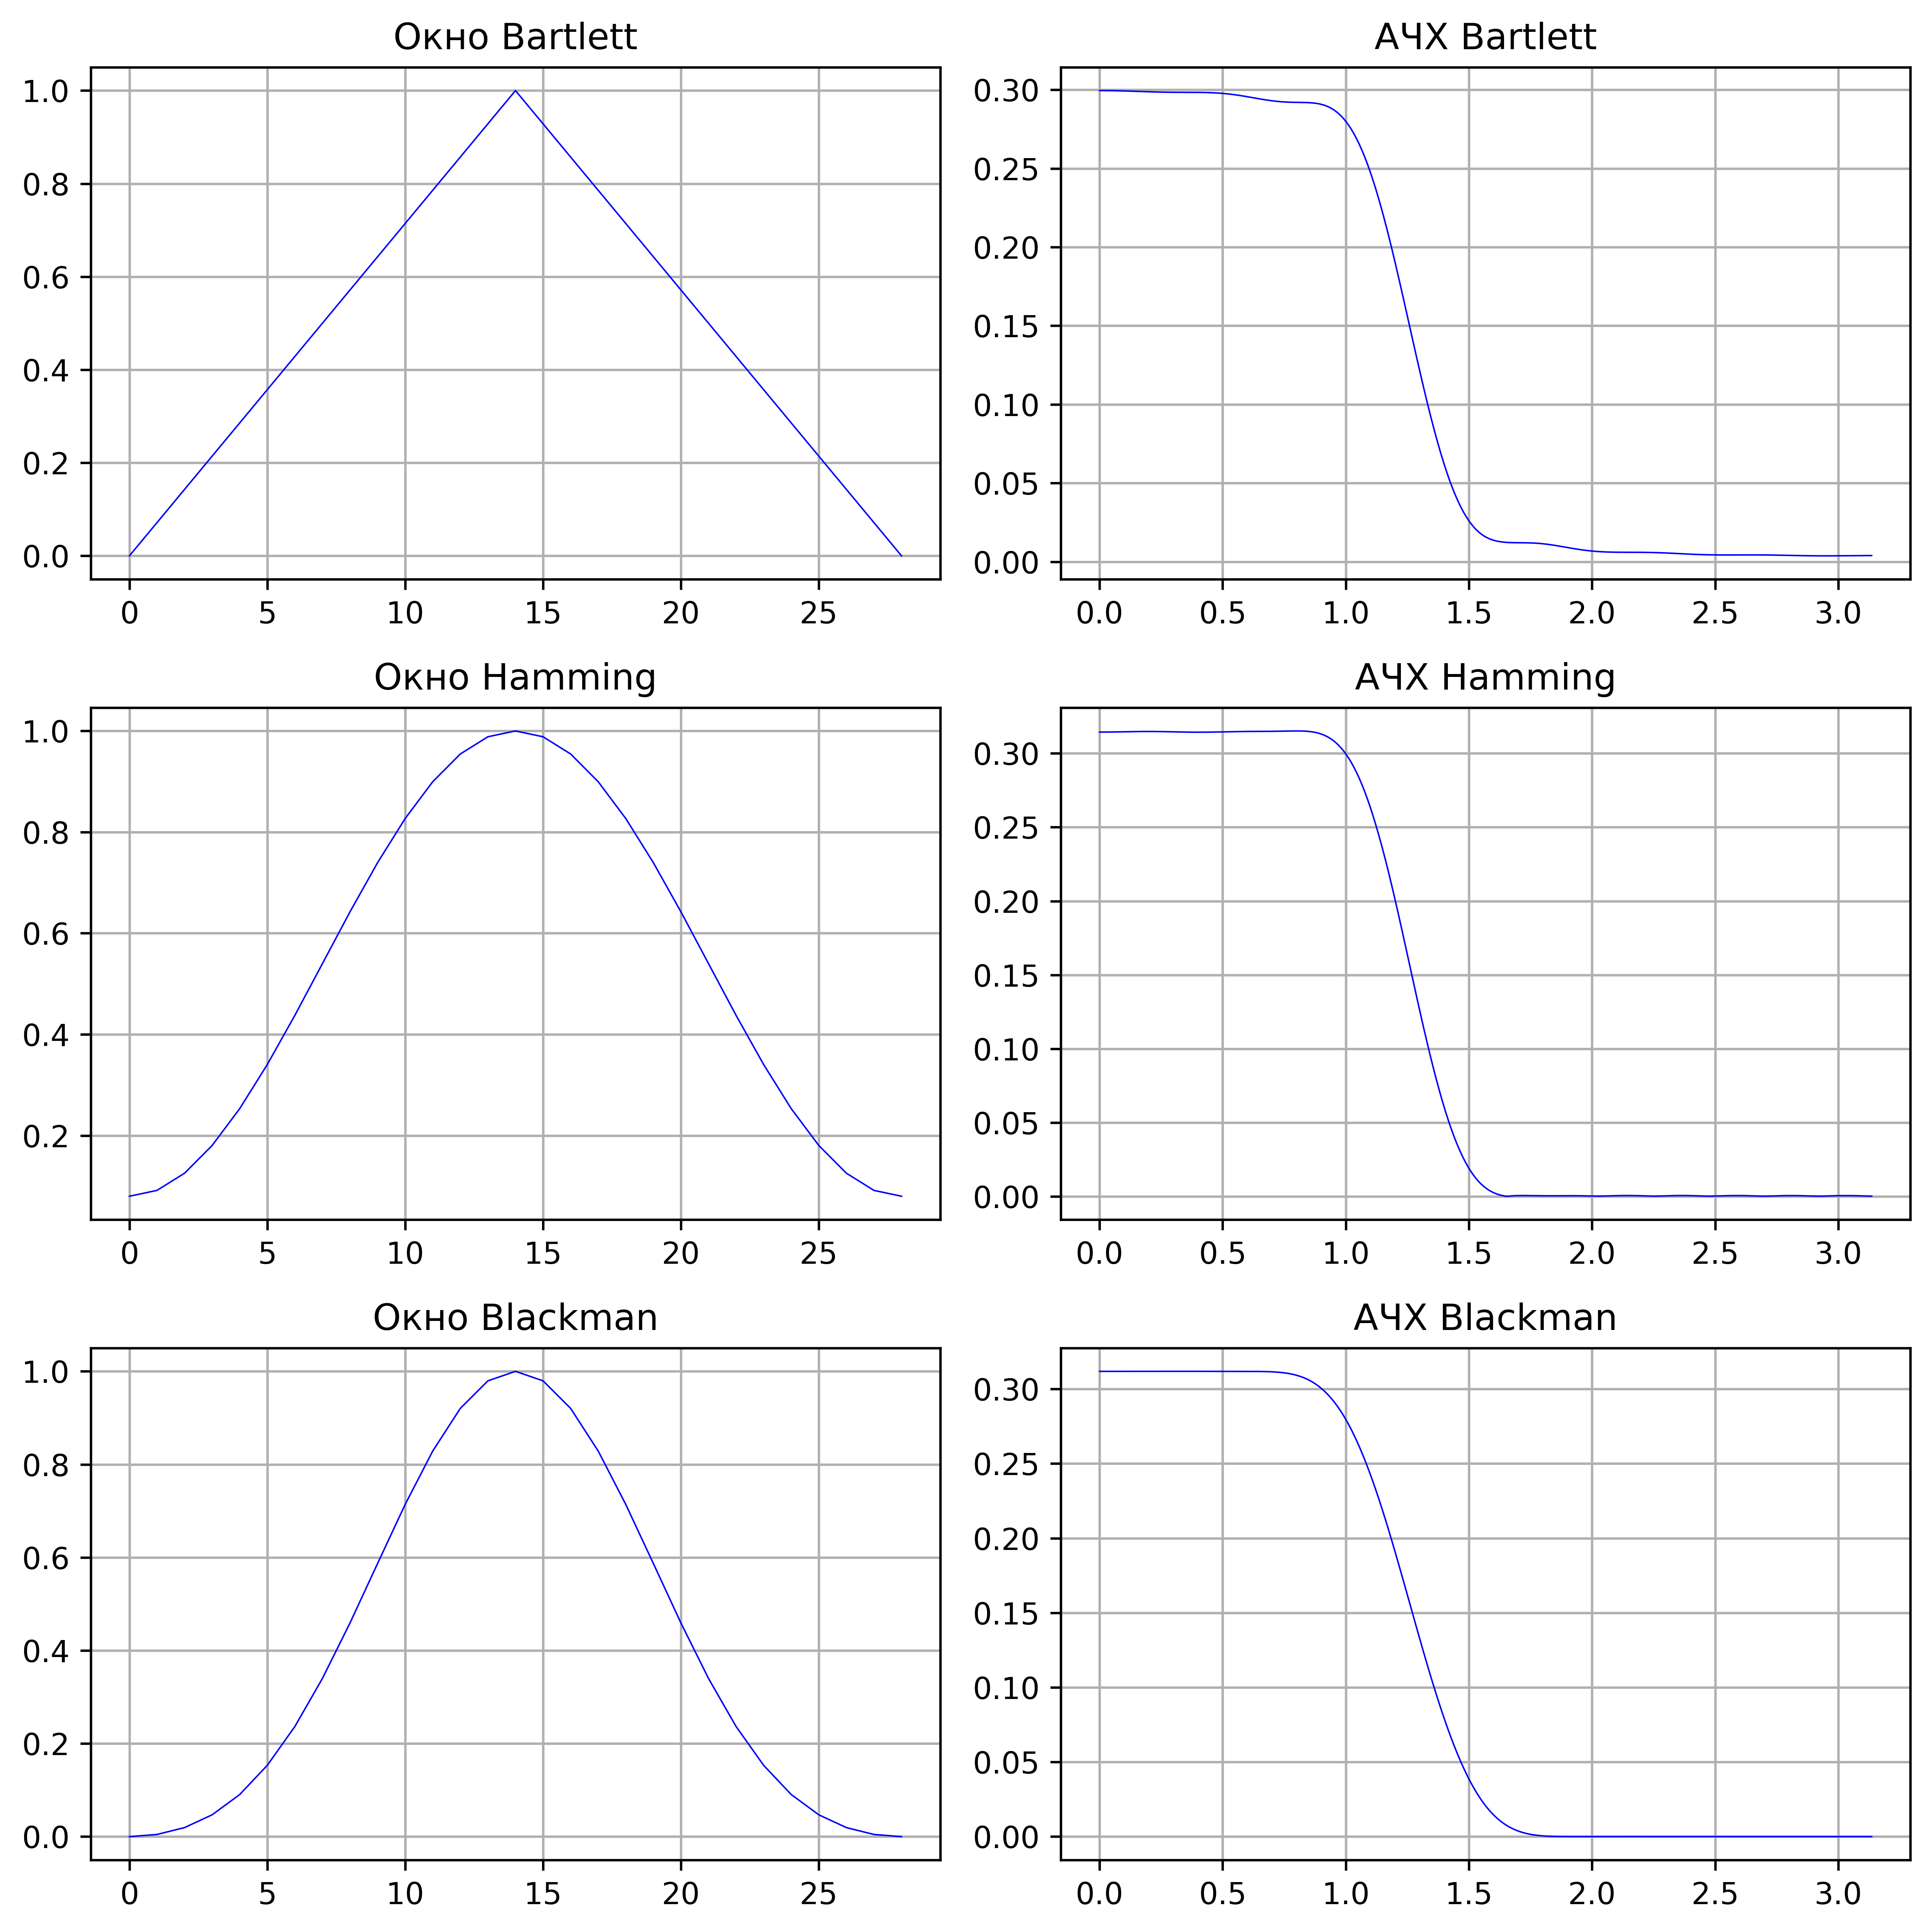

In [157]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

draw(1, w_bart, x_bart, y_bart, 'Bartlett')
draw(3, w_ham, x_ham, y_ham, 'Hamming')
draw(5, w_bla, x_bla, y_bla, 'Blackman')

pylab.tight_layout()
pylab.savefig('6_2_3_PH.png', dpi=600)
pylab.show()

# 6.2.4
Выполните задание 6.2.1 с использованием временных окон: треугольного, Хэмминга, Блэкмана. Сравните АЧХ этих фильтров. Какой из них обеспечивает наименьшую среднеквадратичную погрешность аппроксимации АЧХ?

In [158]:
def draw(i, x1, y1, y2, name):
    pylab.subplot(3, 2, i)
    pylab.plot(x1, y1, linestyle='-', color='b', linewidth=0.5);
    pylab.grid()
    pylab.title(f'АЧХ {name}')
    pylab.subplot(3, 2, i + 1)
    pylab.plot(x1, y2, linestyle='-', color='b', linewidth=0.5);
    pylab.grid()
    pylab.title(f'АЧХ в логарифмическом масштабе {name}')

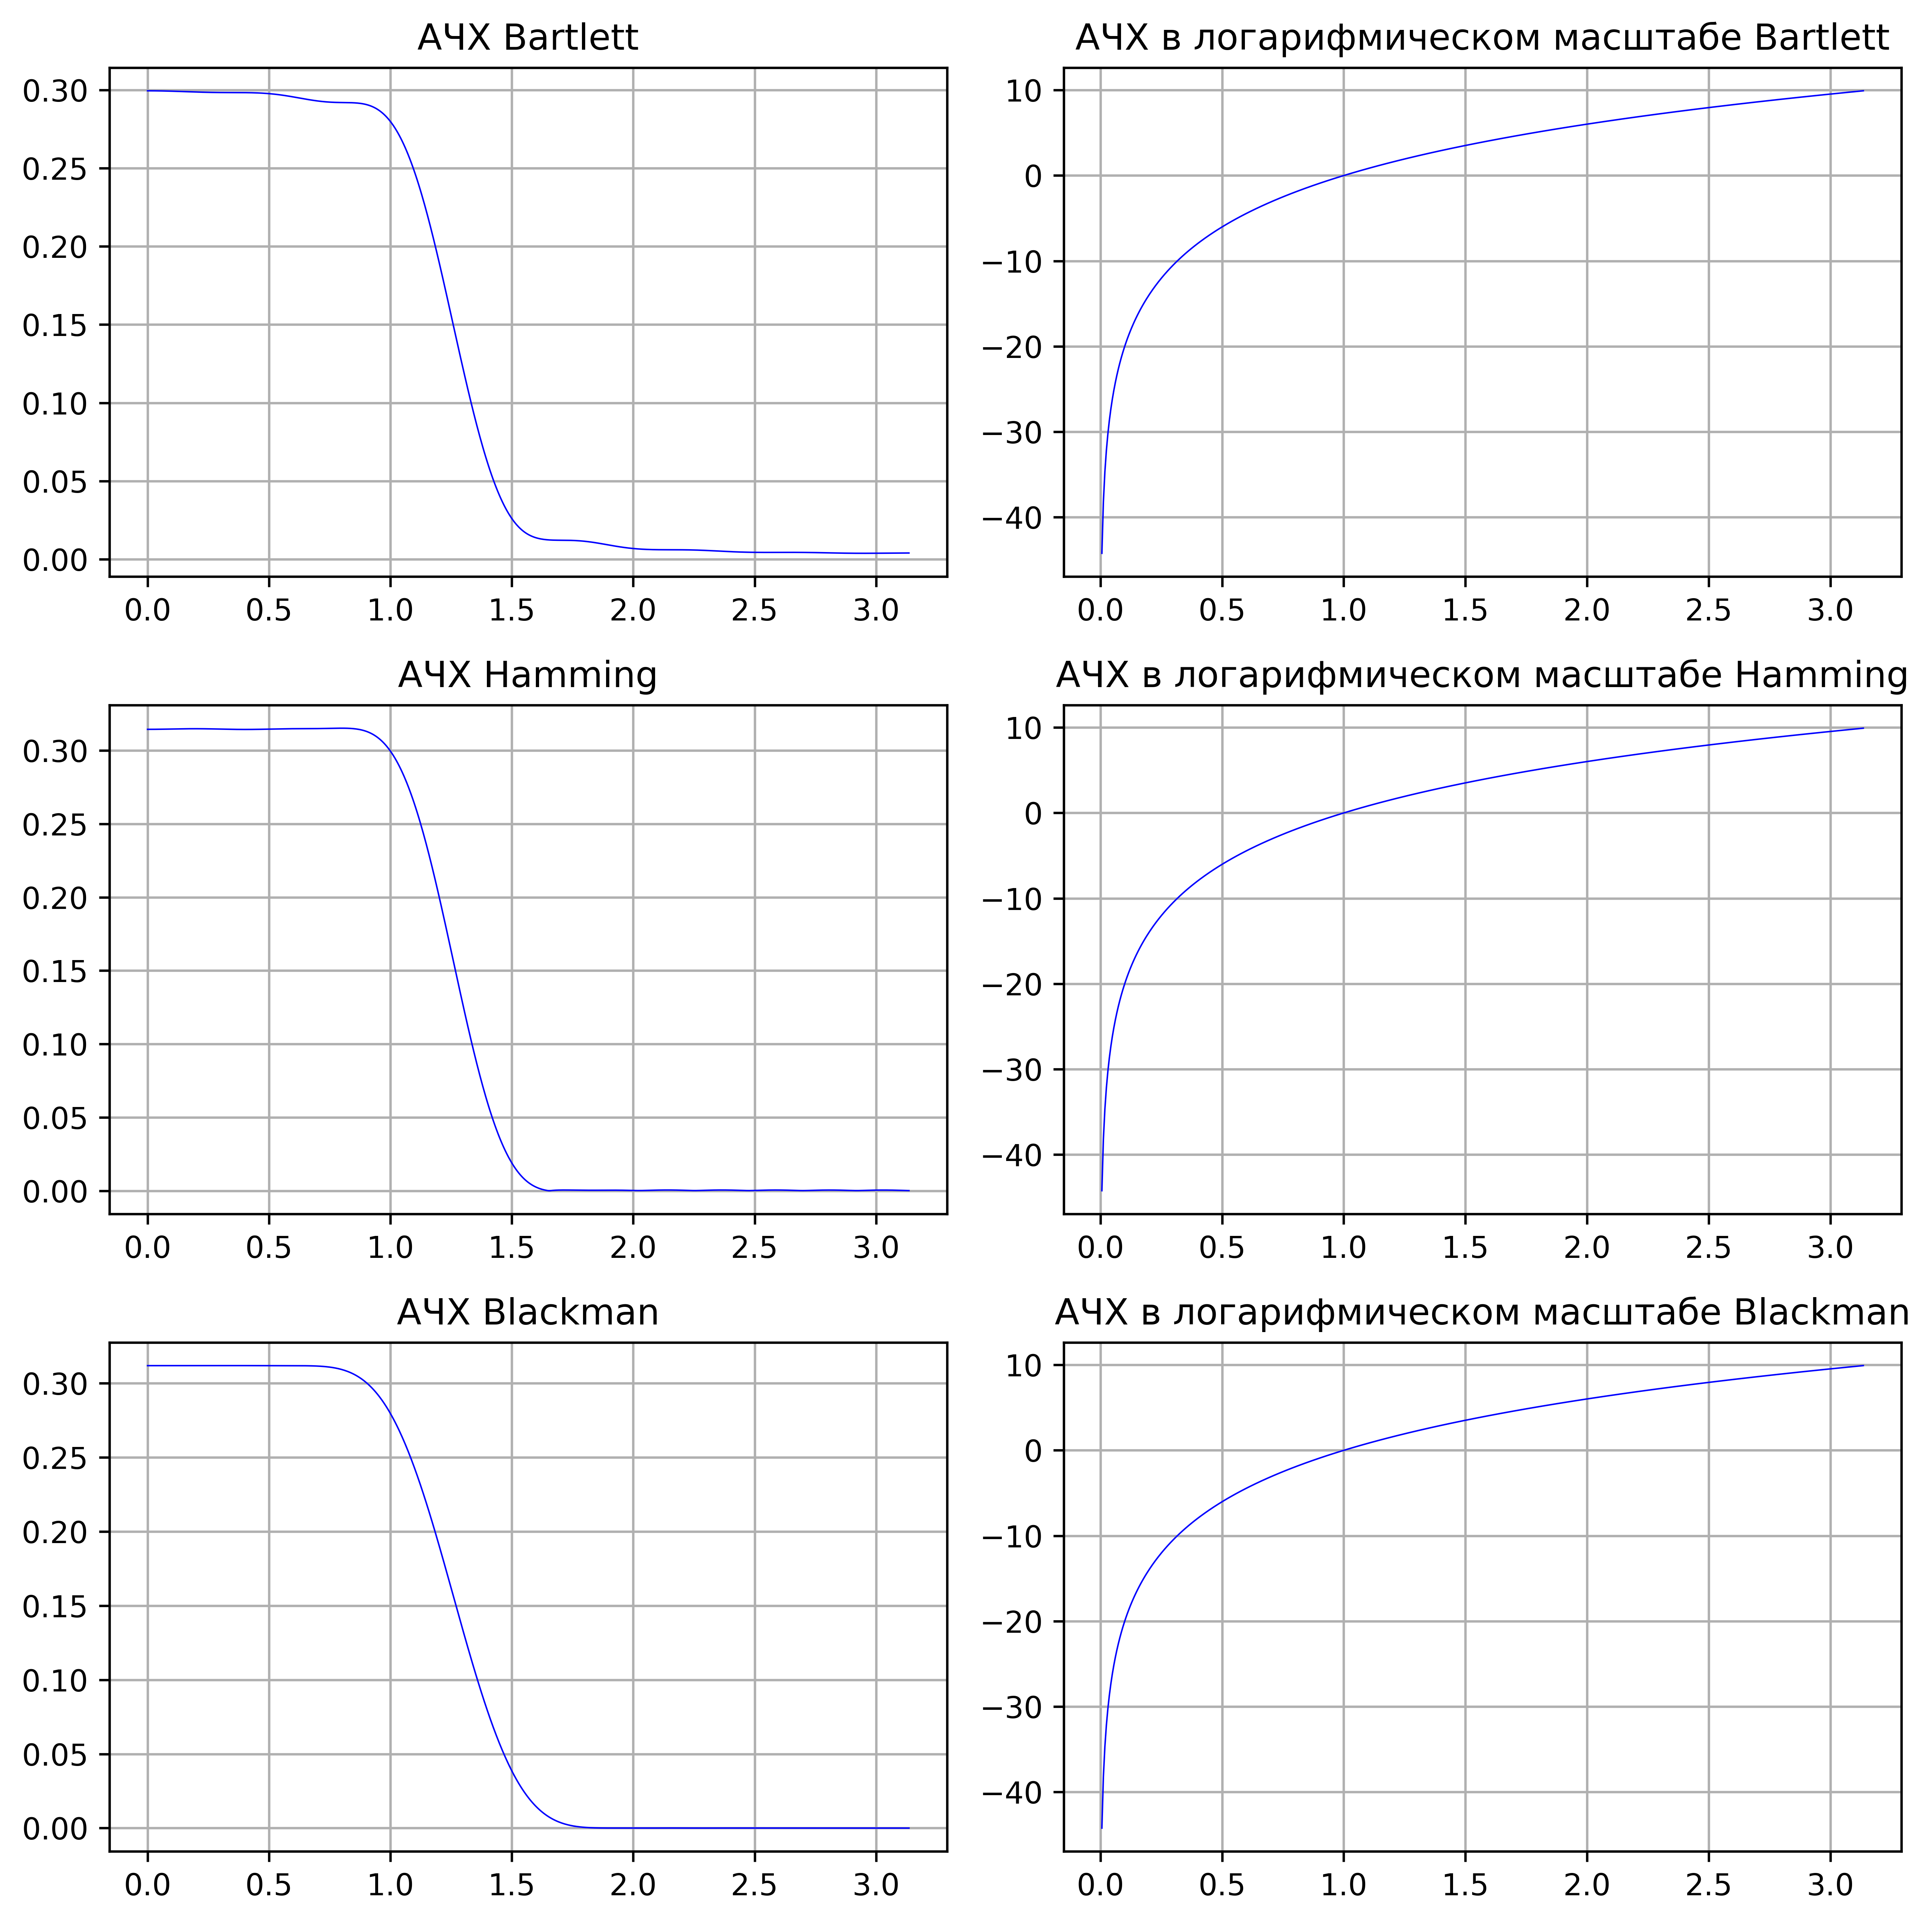

In [159]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

draw(1, x_bart, y_bart, L_bart, 'Bartlett')
draw(3, x_ham, y_ham, L_ham, 'Hamming')
draw(5, x_bla, y_bla, L_bla, 'Blackman')

pylab.tight_layout()
pylab.savefig('6_2_4_PH.png', dpi=600)
pylab.show()

# 6.2.5
Выполните задание 1 с использованием временного окна Кайзера. Определите значение бэта, обеспечивающее минимальную среднеквадратичную погрешность аппроксимации АЧХ.

In [160]:
beta = 1.4

In [161]:
M = N / 2;
n = np.arange(np.floor(-M), np.floor(M))
h = w_sr * np.sinc(w_sr * (n));
w = np.kaiser(N, beta);
h = h * np.transpose(w)
H, wi_r = freqz(h, 1)
H_abs = np.abs(H)
y = np.abs(wi_r) / np.pi
L = 20 * np.log10(np.abs(H))

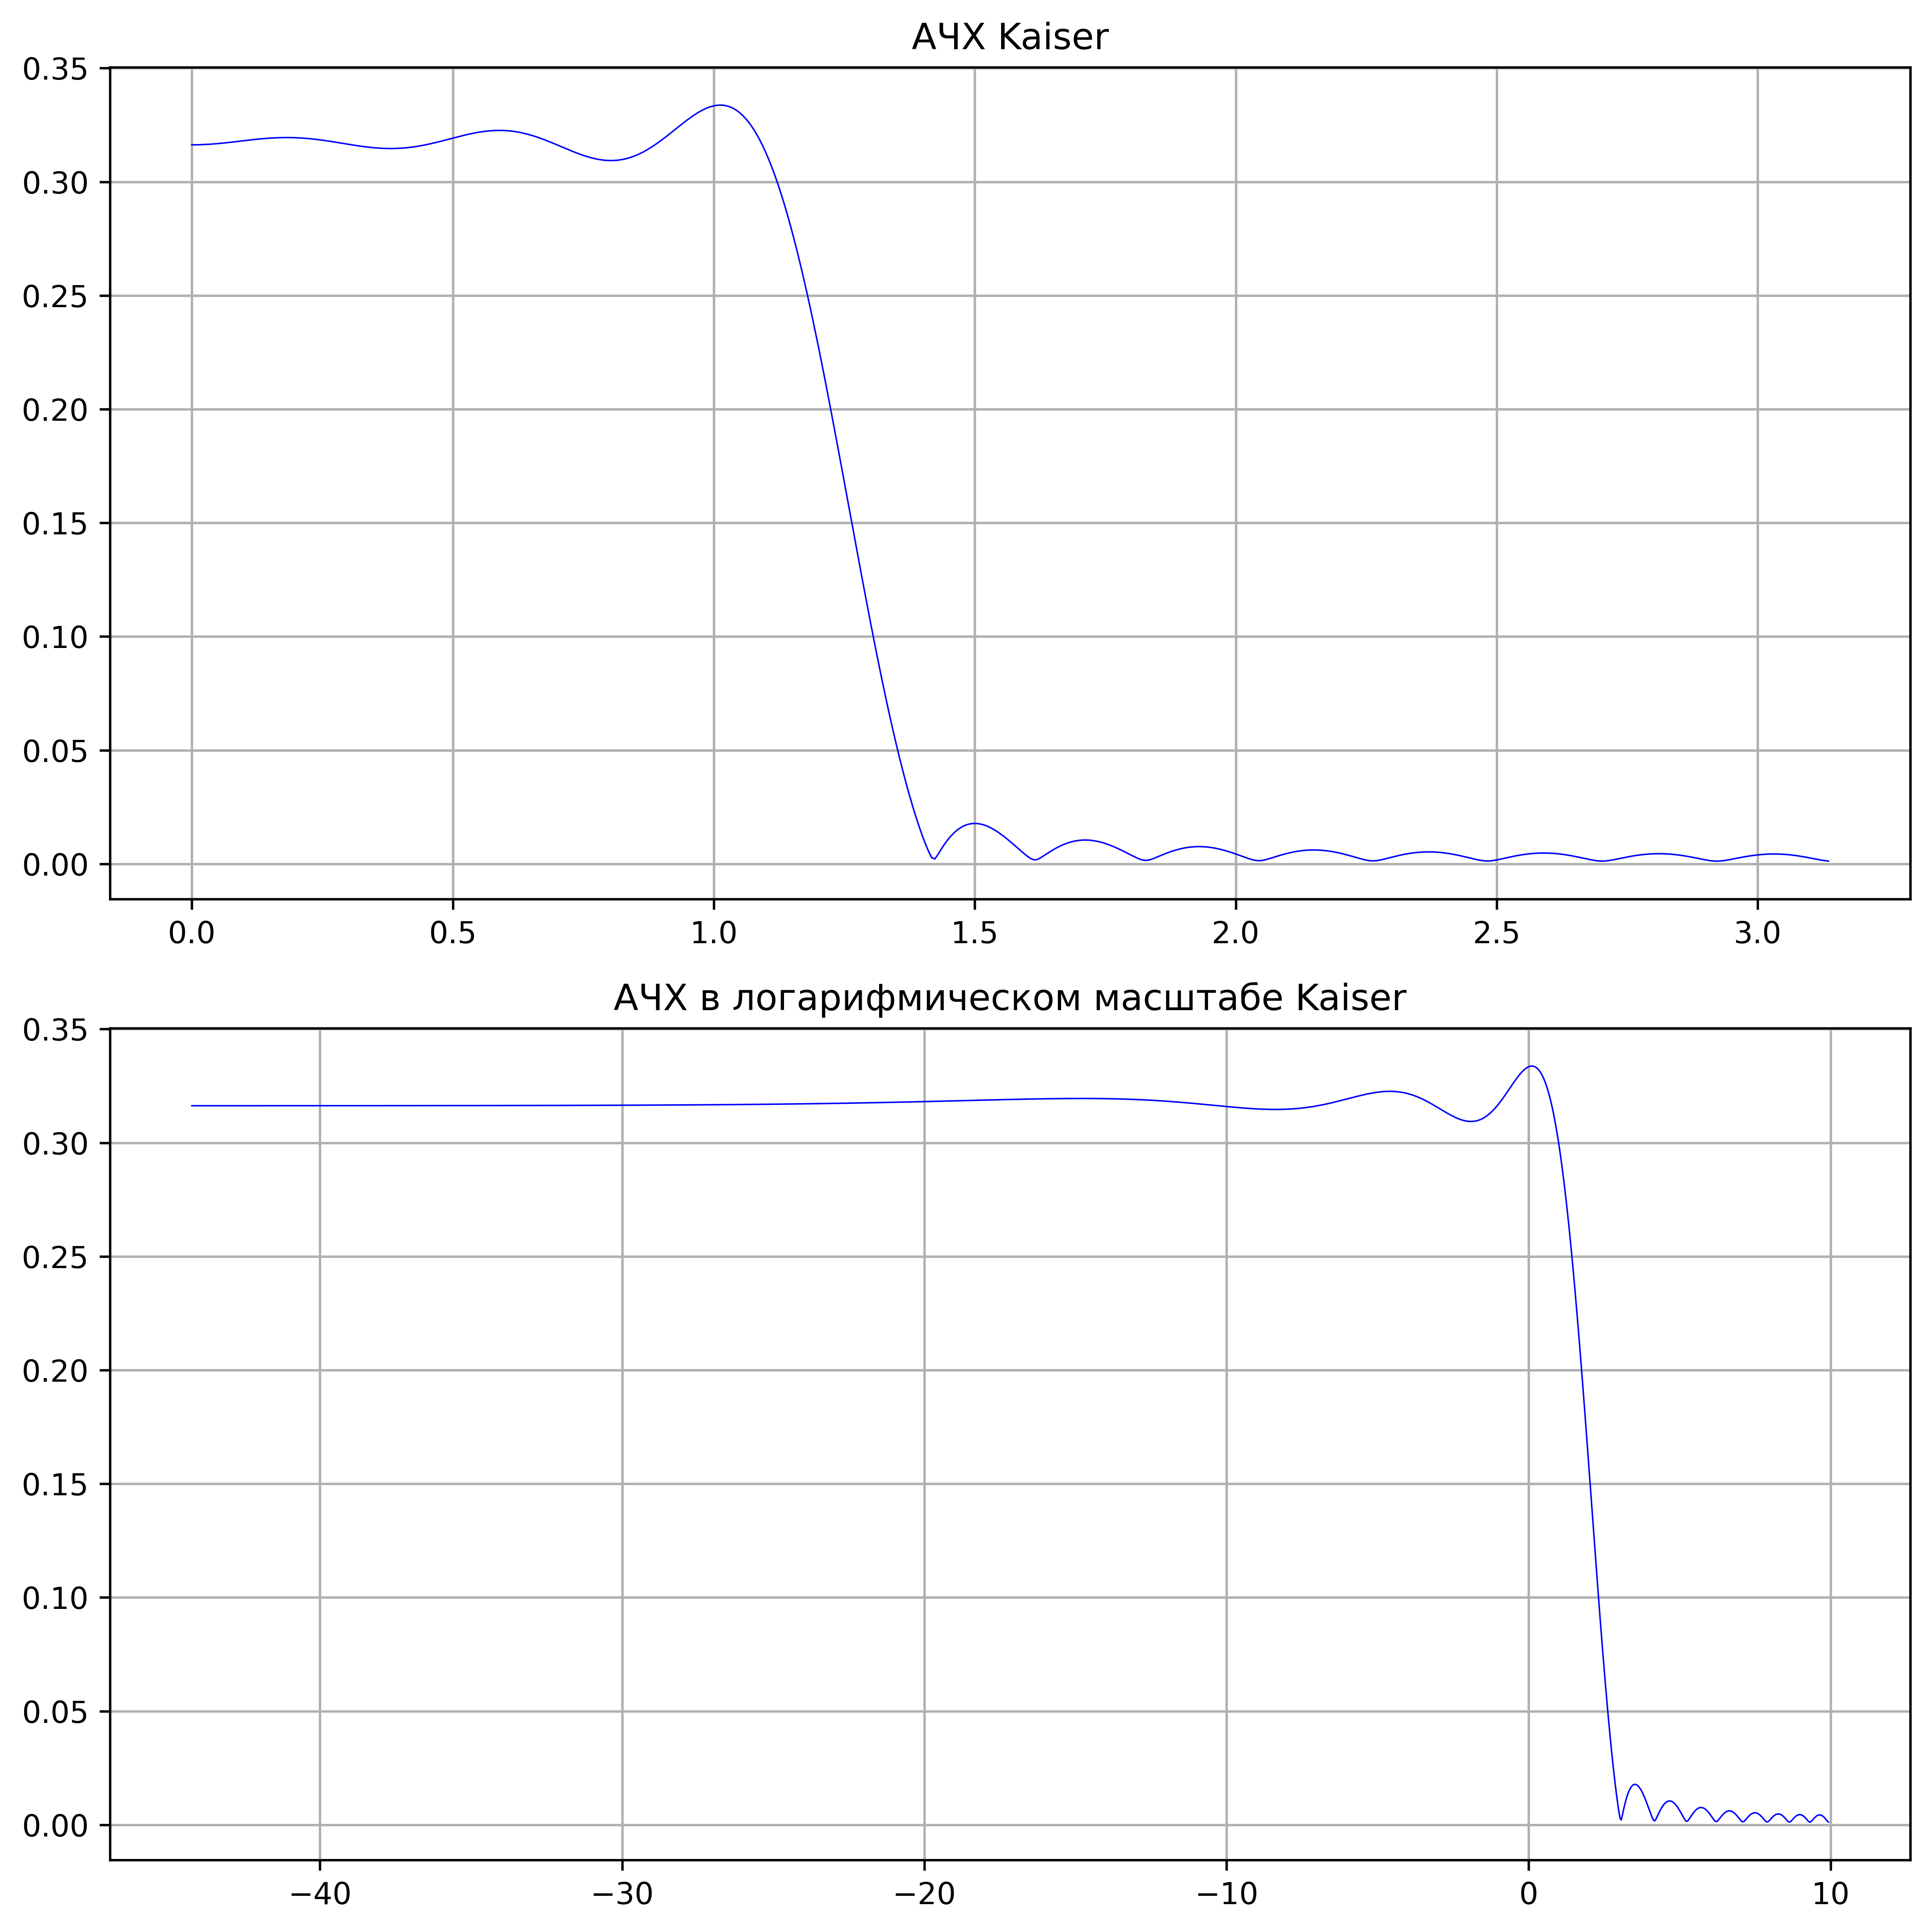

In [162]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(H_abs, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ Kaiser')

pylab.subplot(2, 1, 2)
pylab.plot(L, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ в логарифмическом масштабе Kaiser')

pylab.tight_layout()
pylab.savefig('6_2_5_PH.png', dpi=600)
pylab.show()

# 6.2.6
Используя окно Хэмминга, рассчитайте следующий многополосный КИХ-фильтр с линейной фазой, используя данные табл. 6.4.

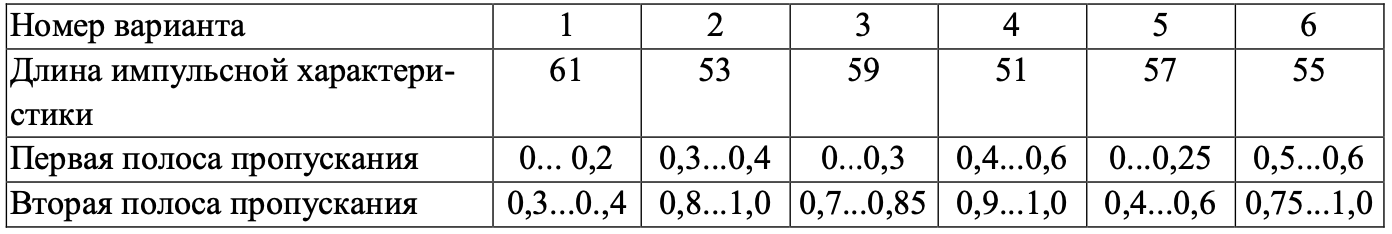

Коэффициент передачи в первой полосе пропускания равен единице, а во второй полосе – 0,5. Постройте идеальную и полученную АЧХ.

In [163]:
N = 51
w_sr1 = 0.5
w_sr2 = 0.95

In [164]:
M = (N) / 2
n = np.arange(np.floor(-M), np.floor(M))
h1 = w_sr1 * np.sinc(w_sr1 * n);
h2 = w_sr2 * np.sinc(w_sr2 * n);
h = h1 + h2
w = np.hamming(N);
h = h * np.transpose(w)
H, wi_r = freqz(h, 1)
H_abs = np.abs(H)
y = np.abs(wi_r) / np.pi
L = 20 * np.log10(np.abs(H))

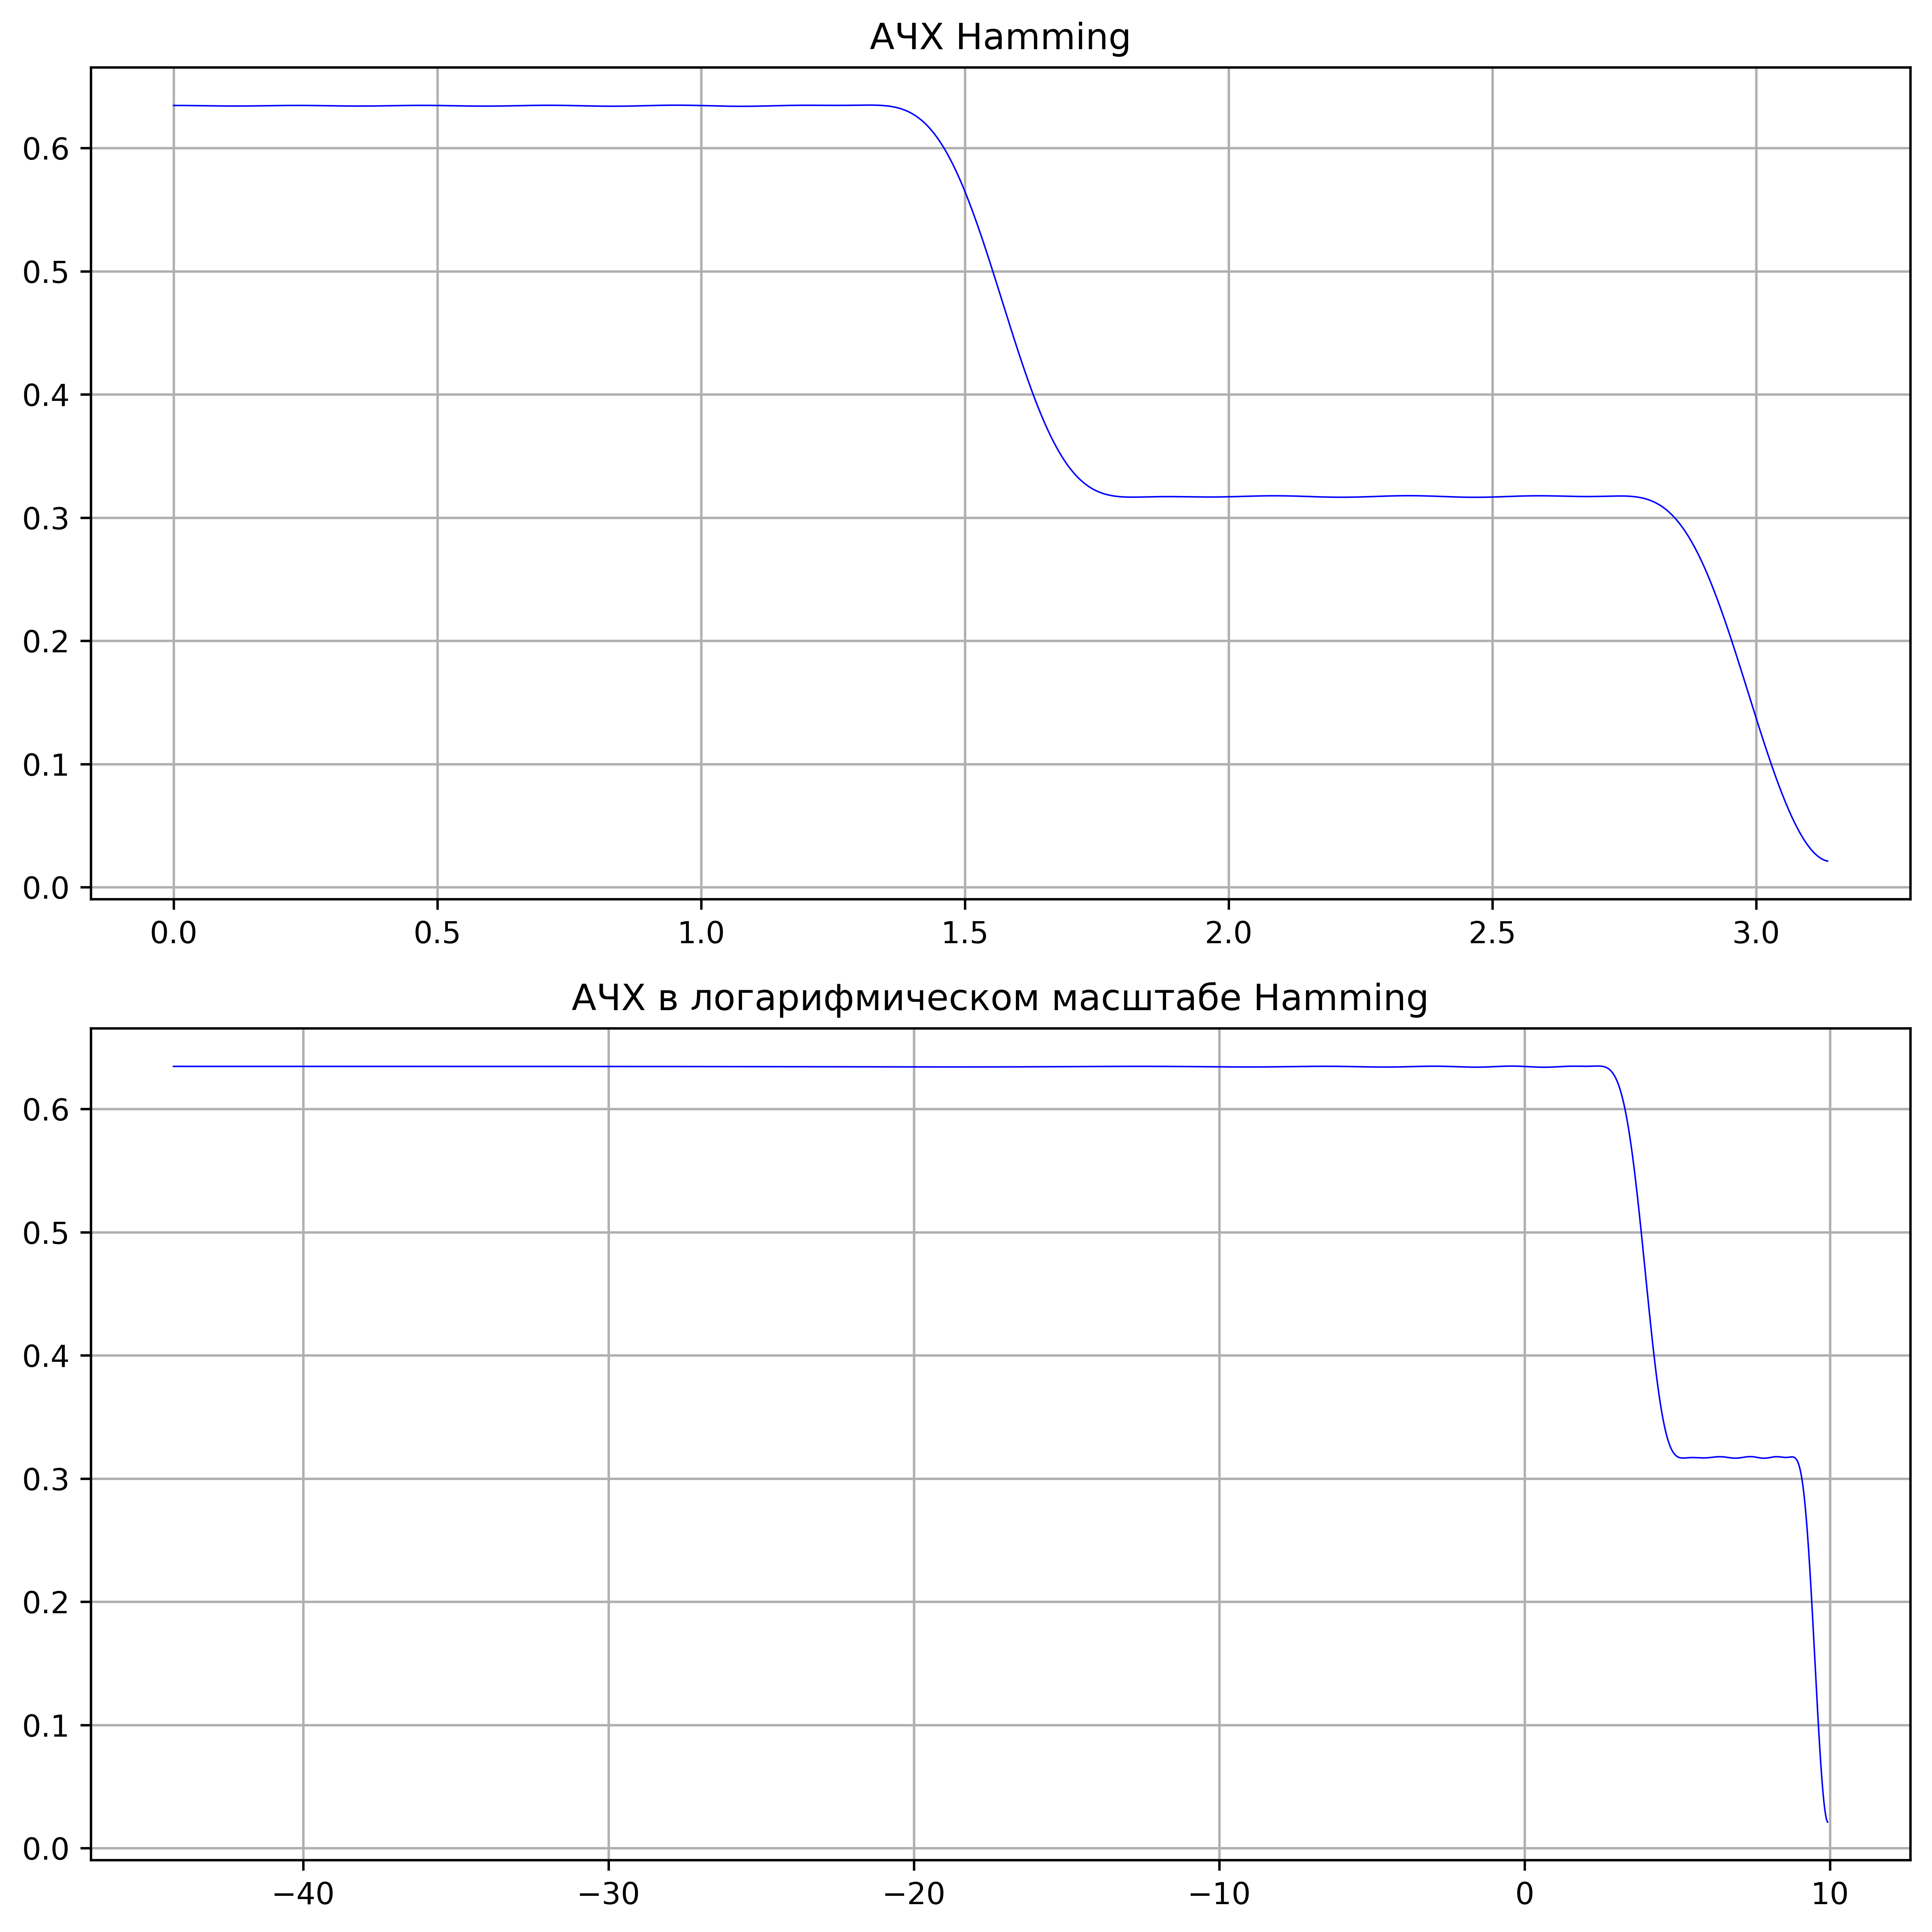

In [165]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(H_abs, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ Hamming')

pylab.subplot(2, 1, 2)
pylab.plot(L, y, linestyle='-', color='b', linewidth=0.5);
pylab.grid()
pylab.title('АЧХ в логарифмическом масштабе Hamming')

pylab.tight_layout()
pylab.savefig('6_2_6_PH.png', dpi=600)
pylab.show()